In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

X.shape: (26, 2)


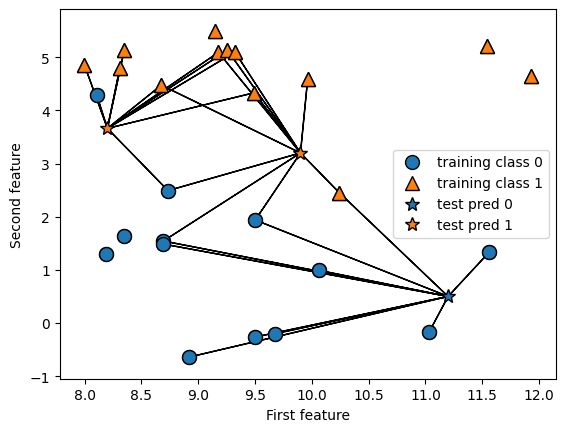

In [3]:
#
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
#İki sınıf ve iki değişken ile bir sınıflandırma
mglearn.plots.plot_knn_classification(n_neighbors=10)

In [4]:
#datayı test ve eğitim için bölelim
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))



Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


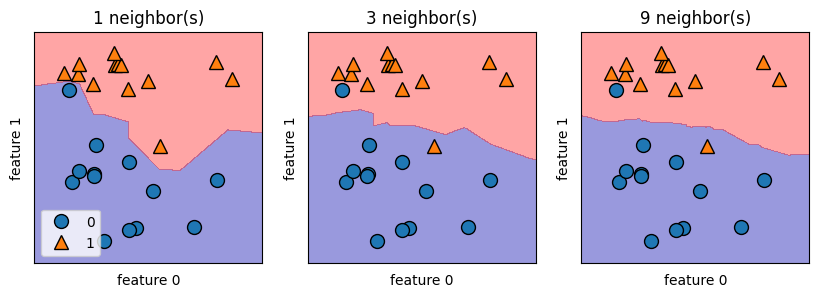

In [5]:
#Farklı n değerleri için karar sınırları, görüldüğü üzere 1 komşu modeli en iyisidir
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
 # the fit method returns the object self, so we can instantiate
 # and fit in one line
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.7, ax=ax, alpha=.4)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{} neighbor(s)".format(n_neighbors))
 ax.set_xlabel("feature 0")
 ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Text(0, 0.5, 'Target')

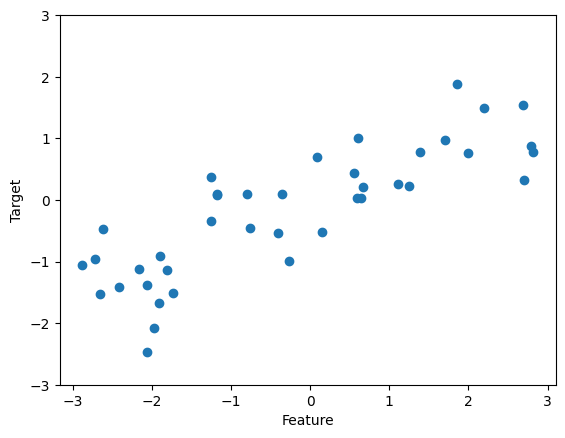

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n".format(cancer.keys()))

cancer.keys(): 



Text(0, 0.5, 'accuracy')

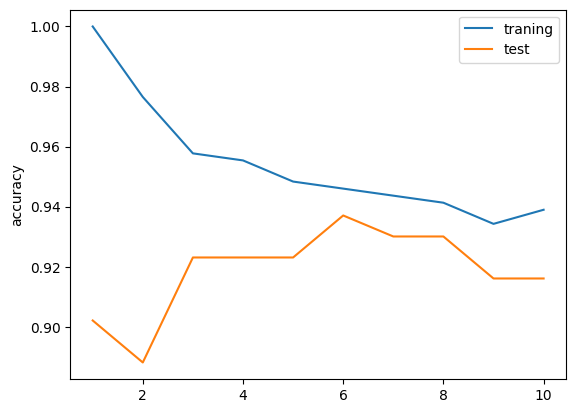

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #modeli kuralım
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label = "traning")
plt.plot(neighbors_settings, test_accuracy, label = "test")
plt.legend(loc = 1)
plt.ylabel("accuracy")

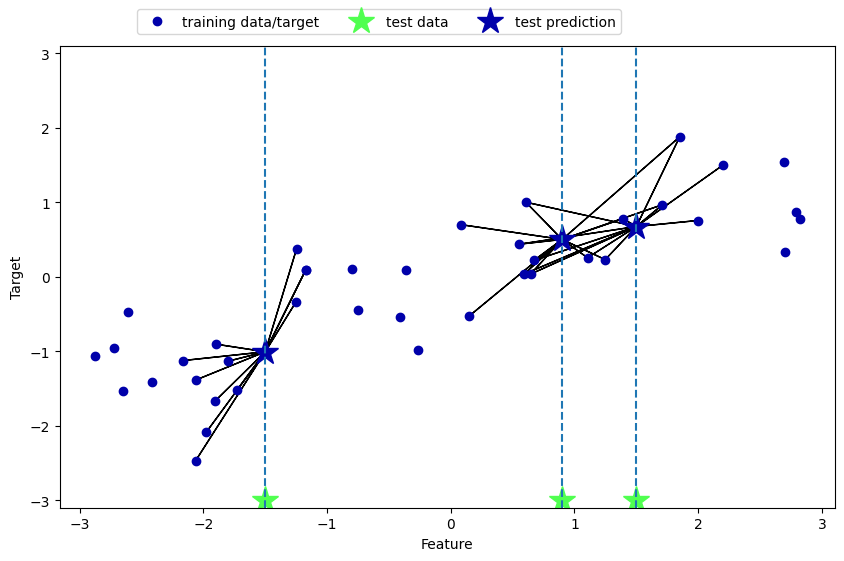

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=12)